# Analysis of the Personal Key Indicators of Heart Disease Dataset

## Goal of our Analysis
---

1. Analyze the dataset and pull out meaningful contributions after first investigating various Data Trends and Analyses. 
2. Look deeper into different ways to model the data and see if there is any correlation between the feature variables and the validation labels.

## About the Dataset

---

### Key Indicators of Heart Disease

#### 2020 annual CDC survey data of 400k adults related to their health status

[Data Set Link](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)

[Original CDC Data Set Link](https://www.cdc.gov/brfss/annual_data/annual_data.htm)

#### Where did our data originate from?

The dataset used in our analysis is derived from the CDC's Behavioral Risk Factor Surveillance System, which is an annual survey that investigates the health status of U.S. residents. Note that we are not working with the raw data gathered from this survey, but with a dataset derived from this survey that has undergone preprocessing by a third-party author.

#### Who Collects the Data

The dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

#### Data Collection Process

The BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. The most recent dataset (as of February 15, 2022) includes data from 2020 consisting of **401,958 rows and 279 columns**. The vast majority of columns are questions asked to respondents about their health status, such as:

- "Do you have serious difficulty walking or climbing stairs?"
- "Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]". 

#### Data Manipulation

In this dataset, the author noticed many different factors (questions) that directly or indirectly influence heart disease, so they decided to select the most relevant variables from it and do some cleaning so that it would be usable for machine learning projects. **As described above, the original dataset of nearly 300 variables was reduced to just about 18 variables.**

#### What are the variables in our datset?
- `Heart Disease` (Yes/No): Marks whether subject reports ever having coronary heart disease or myocardial infarction
- `BMI` (Numerical): Records the subject's body mass index
- `Smoking` (Yes/No): Marks whether the subject reports smoking at least 100 cigarettes in their life
- `AlcoholDrinking` (Yes/No): Marks whether the subject reports drinking at least 14 drinks a week
- `Stroke` (Yes/No): Marks whether the subject reports ever having a stroke
- `PhysicalHealth` (Numerical): Records the number of days in the past 30 days the subject reports their physical health as "not good"
- `MentalHealth` (Numerical): Records the number of days in the past 30 days the subject reports their mental health as "not good"
- `DiffWalking` (Yes/No): Marks whether subject reports having difficulty climbing up the stairs 
- `Sex` (Categorical): Records the sex of the subject
- `AgeCategory` (Categorical): Records the age category of the subject
- `Race` (Categorical): Records the race of the subject
- `Diabetic` (Categorical): Marks whether the subject reports ever having diabeties
- `PhysicalActivity` (True/False): Marks whether the subject reports engaging in regular physical activity apart from work
- `GenHealth` (Categorical): Records how the subject rates their own general health
- `Sleep Time` (Numerical): Records how many hours
- `Asthma` (Yes/No):
- `KidneyDisease` (Yes/No):
- `SkinCancer` (Yes/No):

## Data Assumptions

---

#### Author Manipulation

We described in the 'Data Manipulation' Section above, the author redacted 280 different variables based on the idea that it was not necessary or didn't provide helpful information. They gave no explanation for how this was determined, whether that was PCA, Random Forest exploration or other techniques we don't know how or why these features were chosen over the others.

#### Survey User Bias

##### Health Bias

According to the BRFSS [website](https://www.cdc.gov/brfss/about/index.htm) they don't disclose how the annual 400k applicants are chosen. Typically people who are more conscious about their health will go out of their way to fill out health based surveys as it can make an individual feel good about themselves to do so. On the other hand both people with heart disease and or people with physical health struggles and issues will be less inclined to fill out a survey discussing parts of themselves that they may not promote or want to focus on.

##### Communication Bias

Looking at their [documentation guide](https://www.cdc.gov/brfss/data_documentation/pdf/UserguideJune2013.pdf), we see that the interviews are done over landline phones. With the surgance of spam calling and decline of the general public to answer unknown numbers, this could also lead to a possible influx of older generations being more willing to pick up and answer as younger demographics veer away from this methodology with the inherent risks that it poses.


### Brief Data Preview:


In [1]:
#import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import dataframe
df = pd.read_csv("data/heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Methods
---

### Exploratory Data Analysis

We first took a look into the data that we had access to and broke it down to see what the distributions of each feature looked like.

We see that in our data the amount of people that have heart disease, kidney disease and smoking are significantly less that those that do not have those diseases. Because of this we need to take into account that the information on those that do have any of the diseases are much more prone to have their feature sets have much larger weights than those of people that do not have the diseases. This will become especially apparant in our modeling methods. 

Other interesting things that we saw were the large presense of smokers, the minimal amount of alcohol drinking, and asthma. We also saw in terms of demographics that there was a relatively equal size of male to female ratio, but a predominantly white demographic for race. While there is a solid proportion of people that said they had excellent, good or very good physical health, very few actively engaged in physical activity. 

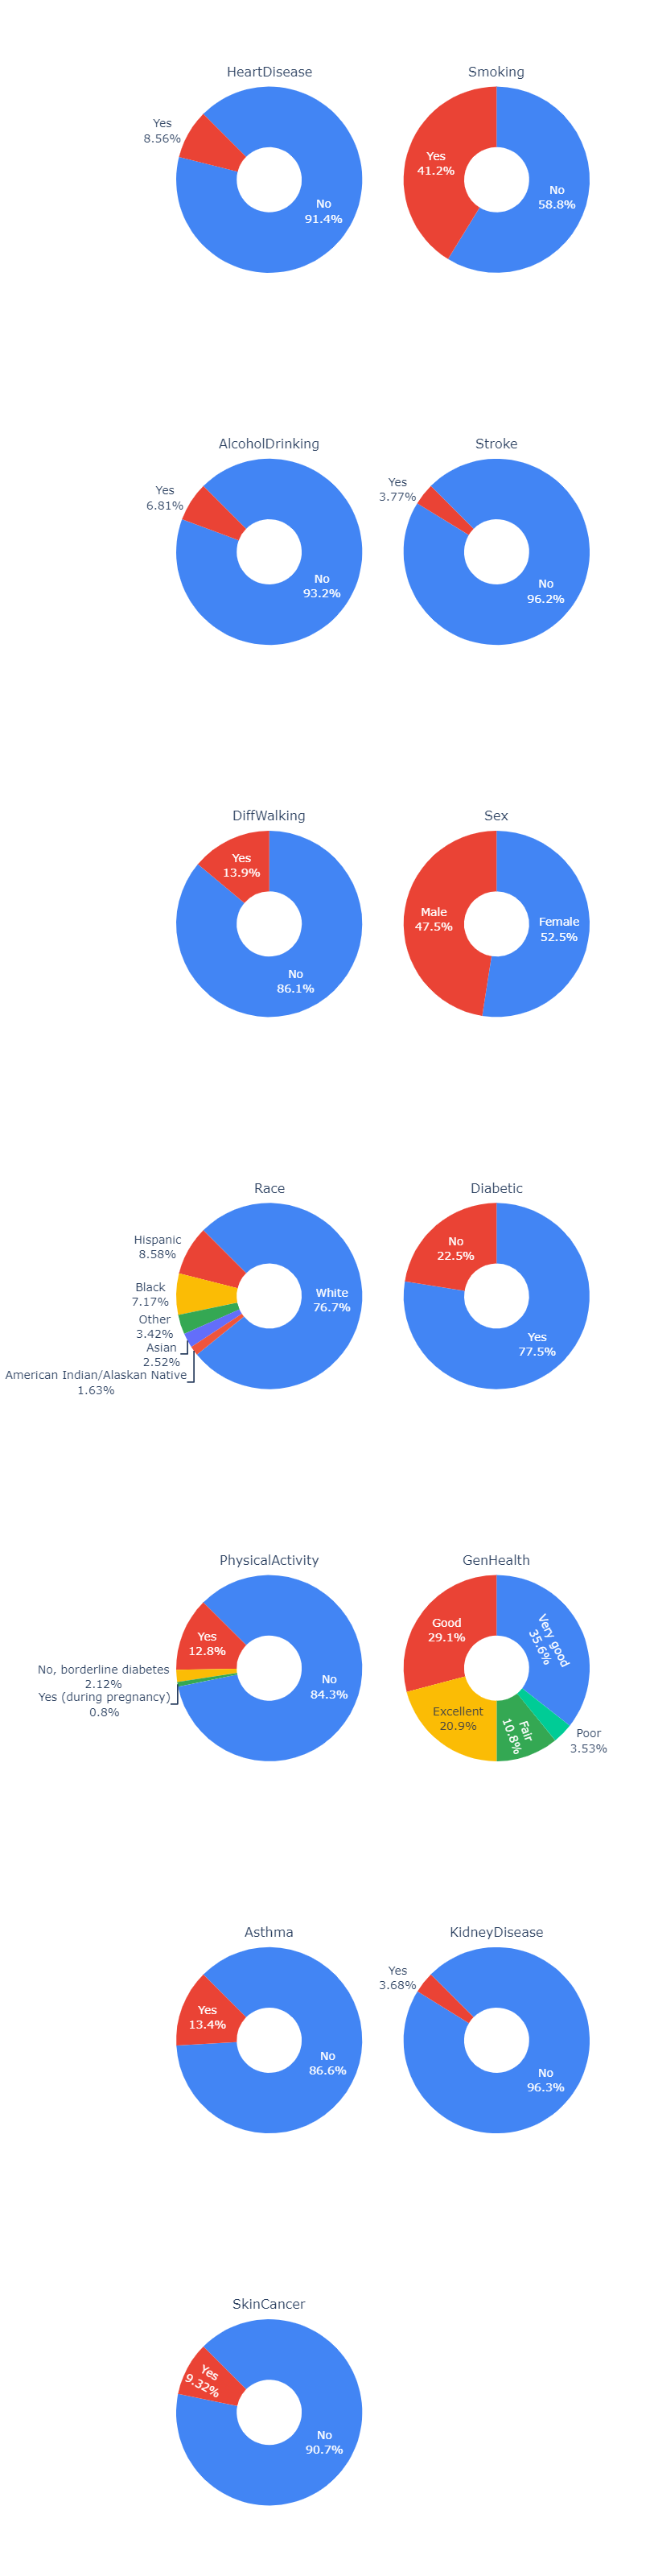

In [3]:
from IPython.display import Image
Image(filename='figures/pie_chart.png')

Here we wanted to look closer at the actual distributions with more specific information. We only chose to look at a subset of five features that held the larger amount of importance in affecting the labels of the dataset.

In figure (2) below, you can see the mean, standard deviation and the quantiles of the data for each of the five features.

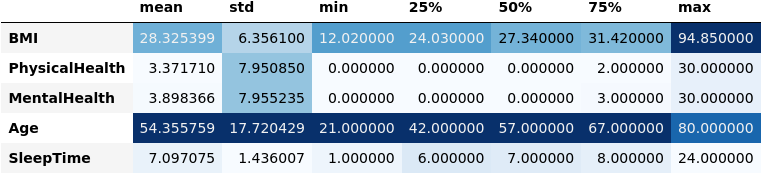

In [4]:
Image(filename='figures/numerical_summary.png')

We then looked at any possible correlations between Age and the various possible diseases that people could get and created a graph plotting the correlation between age an the frequency of the age group to get the specified disease in figure (2).

**Findings:** Here we see that as age goes up, we tend to see that the frequency at which an age group gets any of the diseases increases at a nearly quadratic rate. Whats interesting here is the way that the data fluctuates as age goes up in a near perfect pattern.

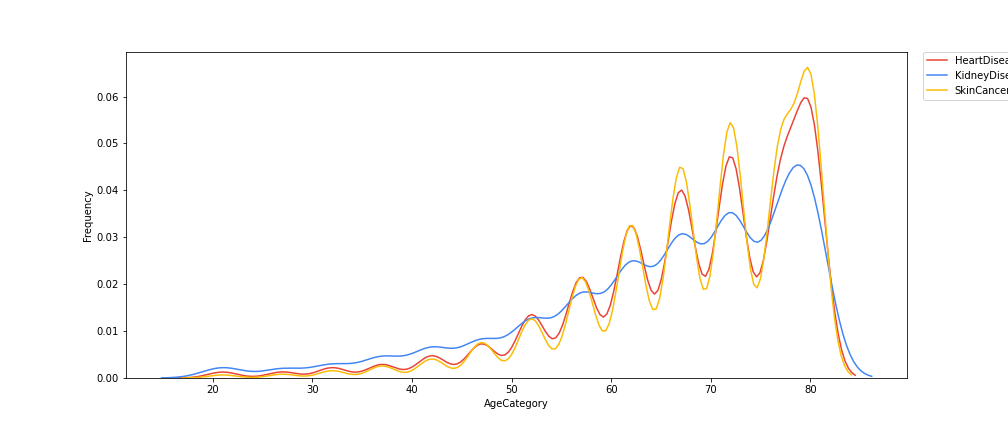

In [5]:

Image(filename='figures/contin_frequency.png')

Here we continued to look at various comparisons of different features with a corresponding disease frequency for the subset of that feature. In the previous figure we looked at a continuous variable in `age`, but in this one we chose to look at discrete variables that are subset into categories. In this figure (3) we looked at the General Health of a person and the frequency at which they would have or not have heart disease in terms of the raw amount of people itself. 

**Findings:** This graph shows that, if looking at the rough proportionality of no heart disease to heart disease ratios, `very good` and `excellent` but have much larger ratios of no heart to heart disease candidates, while as we go to `good`, and `fair` the proportions get worse, and at `poor` it gets to a nearly 1 to 1 ratio of no heart disease to heart disease. This makes sense in the larger context of health as a whole, as people who have generally less good health don't have bodies that are as capable of fighting off various diseases and will have their heart and its condition erode faster than those that take care of it.

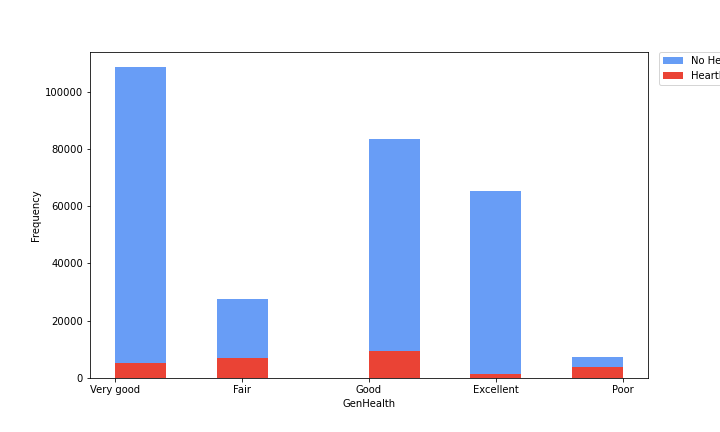

In [6]:
Image(filename='figures/heart_disease.png')

## Results
---

We ran several models including:
- Decision Trees
- Gaussian Naive Bayes
- Logistic Regression
- Gradient Boosting

We then calculated the corresponding accuracy as well as other metrics in the confusion matrix for each classifier and plotted them all together.

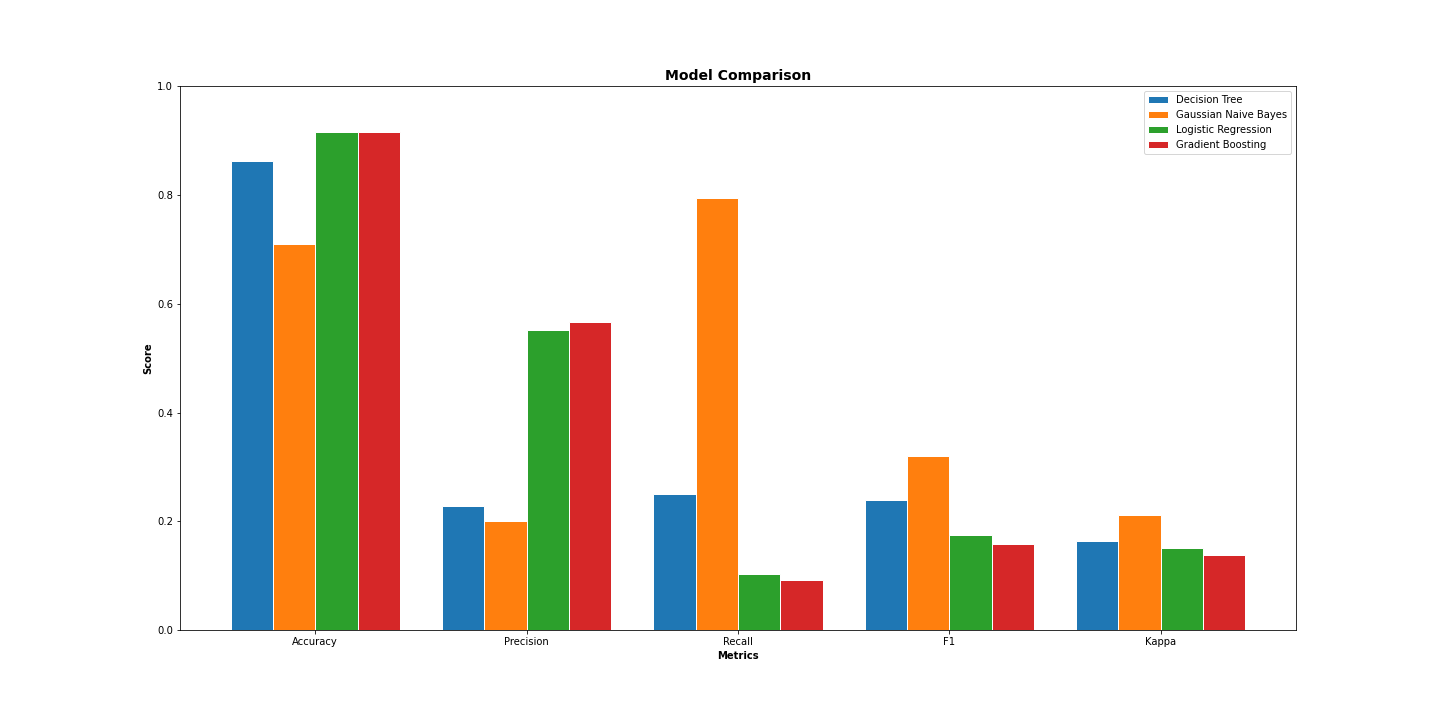

In [7]:
Image('figures/model_comparison.png')

We found that the accuracy for the Logistic Regression and the Gradient Boosting were the highest while the Gaussian Naive Bayes classifier performed the worst. 

### Roc Curve

We also calculated what the ROC Curve would look like for each classifier and plotted them together to show how well each performed.

**Results:** We found that the ROC Curve for the Gaussian Naive Bayes, Logistic Regression and Gradient Boosting had similar aucs all being between .81 and .85, while the Decision Tree had very poor auc with it being close to .58, which is almost near .5 which is equivalent to randomly selecting values. 

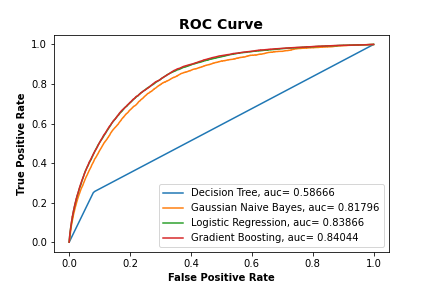

In [8]:
Image('figures/roc_curve.png')

## Conclusion
---

## Author Contributions
---

### Thi
- model notebook

### Wesley
- EDA notebook
- at least 2 function in separate python file

### Sean
- main narrative notebook

### Pradeep
- main narrative notebook 
- author contribution
- makefile